In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/Brian Lee/Downloads/e3ebe0516a586cbb0-yejin1-29.csv")

In [3]:
df

,5.42_Screen_size,6.1_Screen_size,6.7_Screen_size,9h_battery_life,11h_battery_life,13h_battery_life,Camera 12,Camera 24,Camera 48,Price 599,Price 799,Price 999,Price 1199,Taken
0,0,1,0,0,0,1,0,1,0,0,1,0,0,1
1,0,1,0,0,1,0,0,1,0,0,1,0,0,0
2,1,0,0,1,0,0,1,0,1,1,0,0,0,1
3,1,0,0,0,1,0,0,1,0,1,0,0,0,0
4,0,0,1,0,0,1,0,0,1,0,0,0,1,1
5,1,0,0,1,0,0,0,1,0,1,0,0,0,0
6,0,1,0,1,0,0,0,1,0,0,1,0,0,0
7,1,0,0,1,0,0,1,0,0,1,0,0,0,0
8,1,0,0,0,1,0,1,0,0,1,0,0,0,1
9,0,0,1,0,1,0,0,0,1,0,0,1,0,0


In [4]:
df.isnull().sum()

5.42_Screen_size    0
6.1_Screen_size     0
6.7_Screen_size     0
9h_battery_life     0
11h_battery_life    0
13h_battery_life    0
Camera 12           0
Camera 24           0
Camera 48           0
Price 599           0
Price 799           0
Price 999           0
Price 1199          0
Taken               0
dtype: int64

In [6]:
clean_df = df

In [7]:
y_col = 'Taken'
y = clean_df[y_col]
X = clean_df[clean_df.columns.drop(y_col)]

In [8]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [9]:
res = sm.OLS(y, X, family=sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Taken   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.9253
Date:                Thu, 27 Oct 2022   Prob (F-statistic):              0.531
Time:                        23:48:54   Log-Likelihood:                -35.701
No. Observations:                  58   AIC:                             97.40
Df Residuals:                      45   BIC:                             124.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
5.42_Screen_size    -0.4561      0.613     -0.744      0.461      -1.690       0.778
6.1_Screen_size     -0.3677      0.590     -0.623      0.536      -1.556       0.820
6.7_Screen_size     -0.3186      0.565     -0.564      0.576      -1.457       0.820
9h_battery_life     -0.1141      0.348     -0.328      0.745      -0.815       0.587
11h_battery_life     0.0475      0.331      0.143      0.887      -0.620       0.715
13h_battery_life     0.0310      0.329      0.094      0.925      -0.631       0.693
Camera 12           -0.2789      0.336     -0.829      0.411      -0.956       0.399
Camera 24            0.0129      0.328      0.039      0.969      -0.647       0.673
Camera 48            0.2962      0.309      0.960      0.342      -0.325       0.918
Price 599            1.0677      0.726      1.470      0.148      -0.395       2.530
Price 799            0.7642      0.695      1.099      0.278      -0.636       2.165
Price 999            0.8179      0.678      1.207      0.234      -0.547       2.183
Price 1199           0.8175      0.738      1.107      0.274      -0.669       2.304
==============================================================================
Omnibus:                       11.727   Durbin-Watson:                   2.751
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                3.166
Skew:                           0.031   Prob(JB):                        0.205
Kurtosis:                       1.857   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

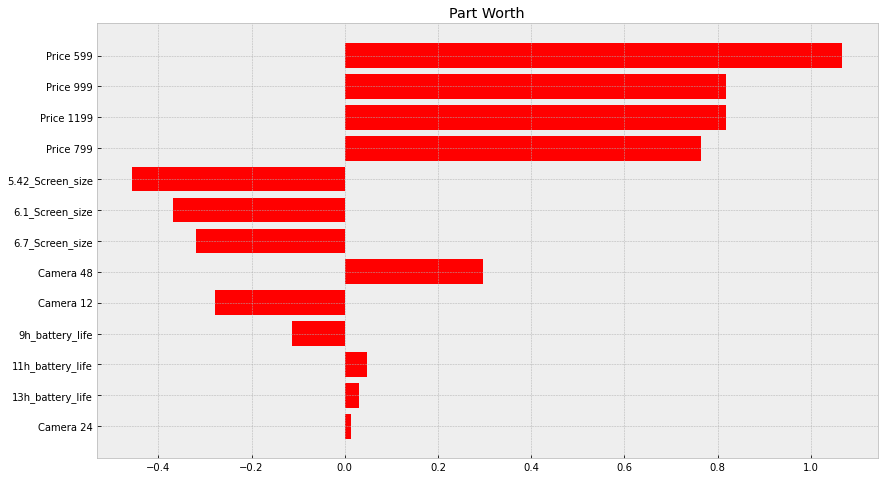

In [11]:
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

In [12]:
# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in res.params.items():
    sk =  key.split('_')
    feature = sk[0]
    if len(sk) == 1:
        feature = key
    if feature not in range_per_feature:
        range_per_feature[feature] = list()
        
    range_per_feature[feature].append(coeff)

In [13]:
from __future__ import division

In [25]:
# importance per feature is range of coef in a feature
# while range is simply max(x) - min(x)
importance_per_feature = {
    k: max(v)- min(v) for k, v in range_per_feature.items()
}

# compute relative importance per feature
# or normalized feature importance by dividing 
# sum of importance for all features
total_feature_importance = sum(importance_per_feature.values())
relative_importance_per_feature = {
    k: 100 * round(v/total_feature_importance, 3) for k, v in importance_per_feature.items()
}

ZeroDivisionError: float division by zero

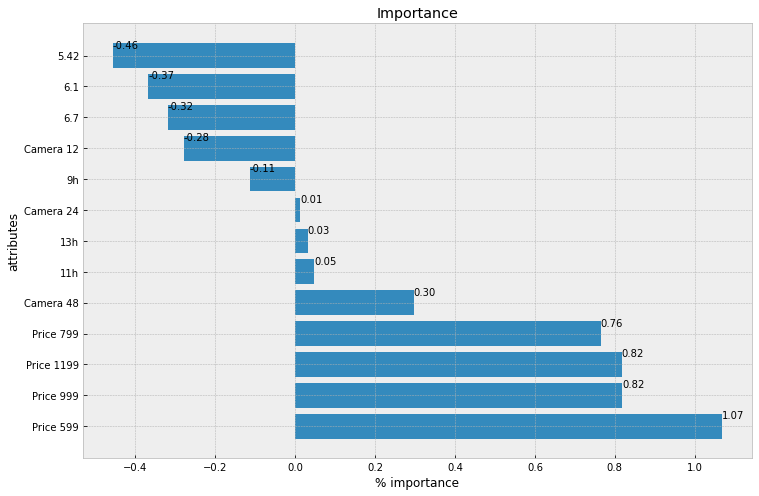

In [20]:
alt_data = pd.DataFrame(
    list(importance_per_feature.items()), 
    columns=['attr', 'importance']
).sort_values(by='importance', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Importance')
plt.barh(xbar, alt_data['importance'])
for i, v in enumerate(alt_data['importance']):
    ax.text(v , i + .25, '{:.2f}'.format(v))
plt.ylabel('attributes')
plt.xlabel('% importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()

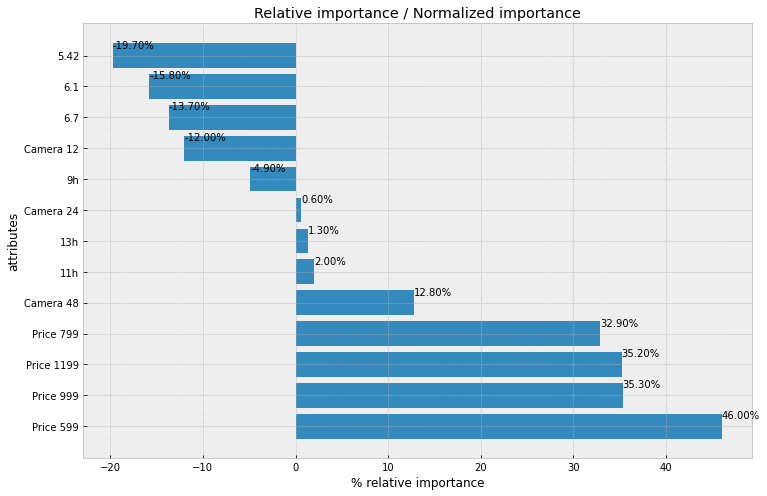

In [21]:
alt_data = pd.DataFrame(
    list(relative_importance_per_feature.items()), 
    columns=['attr', 'relative_importance (pct)']
).sort_values(by='relative_importance (pct)', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Relative importance / Normalized importance')
plt.barh(xbar, alt_data['relative_importance (pct)'])
for i, v in enumerate(alt_data['relative_importance (pct)']):
    ax.text(v , i + .25, '{:.2f}%'.format(v))
plt.ylabel('attributes')
plt.xlabel('% relative importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()